<div class='alert' style='background-color: #273333; color: #E5E7E8; padding:26px 26px; border-radius:15px; font-size:40px;'><B>Show Up</B> for Health - Machine Learning</div><span style='color: #273333; padding:26px 26px; font-size:11px;'> Powered by <B>AutoNote</B> | Jan du Plessis Notebook - <B>Machine Learning</b></span><div style='margin:4px 26px; color:#273333; font-size:17px;'>
</div>

## 📙 Importing Libraries

In [2]:
import pandas as pd 

from showupforhealth.params import *
from showupforhealth.utils import *
from showupforhealth.interface import *
from showupforhealth.ml_functions.preprocessor import *

# Importing default Libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings

# Hi-resolution Plots and Matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Set the maximum number of rows and columns to be displayed
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 1000
warnings.filterwarnings('ignore')

# "magic commands" to enable autoreload of your imported packages
%load_ext autoreload
%autoreload 2

from showupforhealth.utils import *

In [3]:
data = pd.read_csv(f'{OUTPUT_DATA}full_train_data.csv')
data.head()

,Appointment_status,temp,precipitation,Age,Sex,FRAILTY,DEPRESSION,OBESITY,IHD,DM,HPT,NDHG,SMI,IMD2023,dist_to_station,distance_to_surg,book_to_app_days,booked_by_clinician,registered_for_months,sin_week,cos_week,sin_Appointment_time,cos_Appointment_time,sin_month,cos_month,sin_day_of_week,cos_day_of_week,No_shows,Rota_ARRS,Rota_GP,Rota_HCA,Rota_Nurse,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Mixed,Ethnicity_Other,Ethnicity_White
0,1,17.7,0.0,40,0,0.00,0,0,0,0,0,0,0,22698.0,0.519419,0.816996,54.0,1,17.0,-0.120537,-0.992709,0.707107,-0.707107,-0.5,-0.866025,0.781831,0.623490,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,18.5,0.0,70,2,0.39,0,1,0,1,1,0,0,10169.0,0.540792,1.656309,49.0,0,12.0,-0.120537,-0.992709,0.500000,-0.866025,-0.5,-0.866025,0.781831,0.623490,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1,18.5,0.0,70,2,0.39,0,1,0,1,1,0,0,10169.0,0.540792,1.656309,49.0,0,12.0,-0.120537,-0.992709,0.500000,-0.866025,-0.5,-0.866025,0.781831,0.623490,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1,19.4,0.0,66,2,0.03,1,0,0,0,1,0,0,8243.0,0.332691,0.600495,37.0,0,70.0,-0.120537,-0.992709,0.258819,-0.965926,-0.5,-0.866025,0.433884,-0.900969,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,18.3,0.0,58,0,0.11,0,1,0,0,0,0,0,7626.0,0.155802,0.215224,27.0,0,28.0,-0.120537,-0.992709,0.707107,-0.707107,-0.5,-0.866025,0.433884,-0.900969,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Define X & y

In [4]:
X, y = define_X_y(data, 'Appointment_status')

X - independant variable shape: (901516, 36)
y - dependant variable - Appointment_status: (901516,)


## ✂️ Train Test Split

In [12]:
X_train, X_test, y_train, y_test = perform_train_test_split(X, y)

✅ OUTPUT: X_train, X_test, y_train, y_test
Train Set:  X_train, y_train - (721212, 36), (721212,)
 Test Set:  X_test, y_test - - (180304, 36), (180304,)


## ⚖️ Class imbalance


In [13]:
print("DNA distribution in train val and test set pre-oversampling")
print("-"*75)
print(f"There are {pd.Series(y_train).value_counts()[0]} DNAs in the train set")
print(f"There are {pd.Series(y_test).value_counts()[0]} DNAs in the test set")

DNA distribution in train val and test set pre-oversampling
---------------------------------------------------------------------------
There are 27407 DNAs in the train set
There are 6977 DNAs in the test set


## 🔁 Oversampling SMOTE

In [14]:
X_train_os, y_train_os = oversample_with_smote(X_train, y_train, sampling_strategy=0.1)

✅ Data Oversampled: SMOTE - X_train_os:(763185, 36) y_train_os :(763185,)


In [15]:
print("DNAs in X_train_os post-oversampling")
print("-"*75)
print(f"There are {pd.Series(y_train_os).value_counts()[0]} DNAs in the train set")

DNAs in X_train_os post-oversampling
---------------------------------------------------------------------------
There are 69380 DNAs in the train set


KeyError: 0

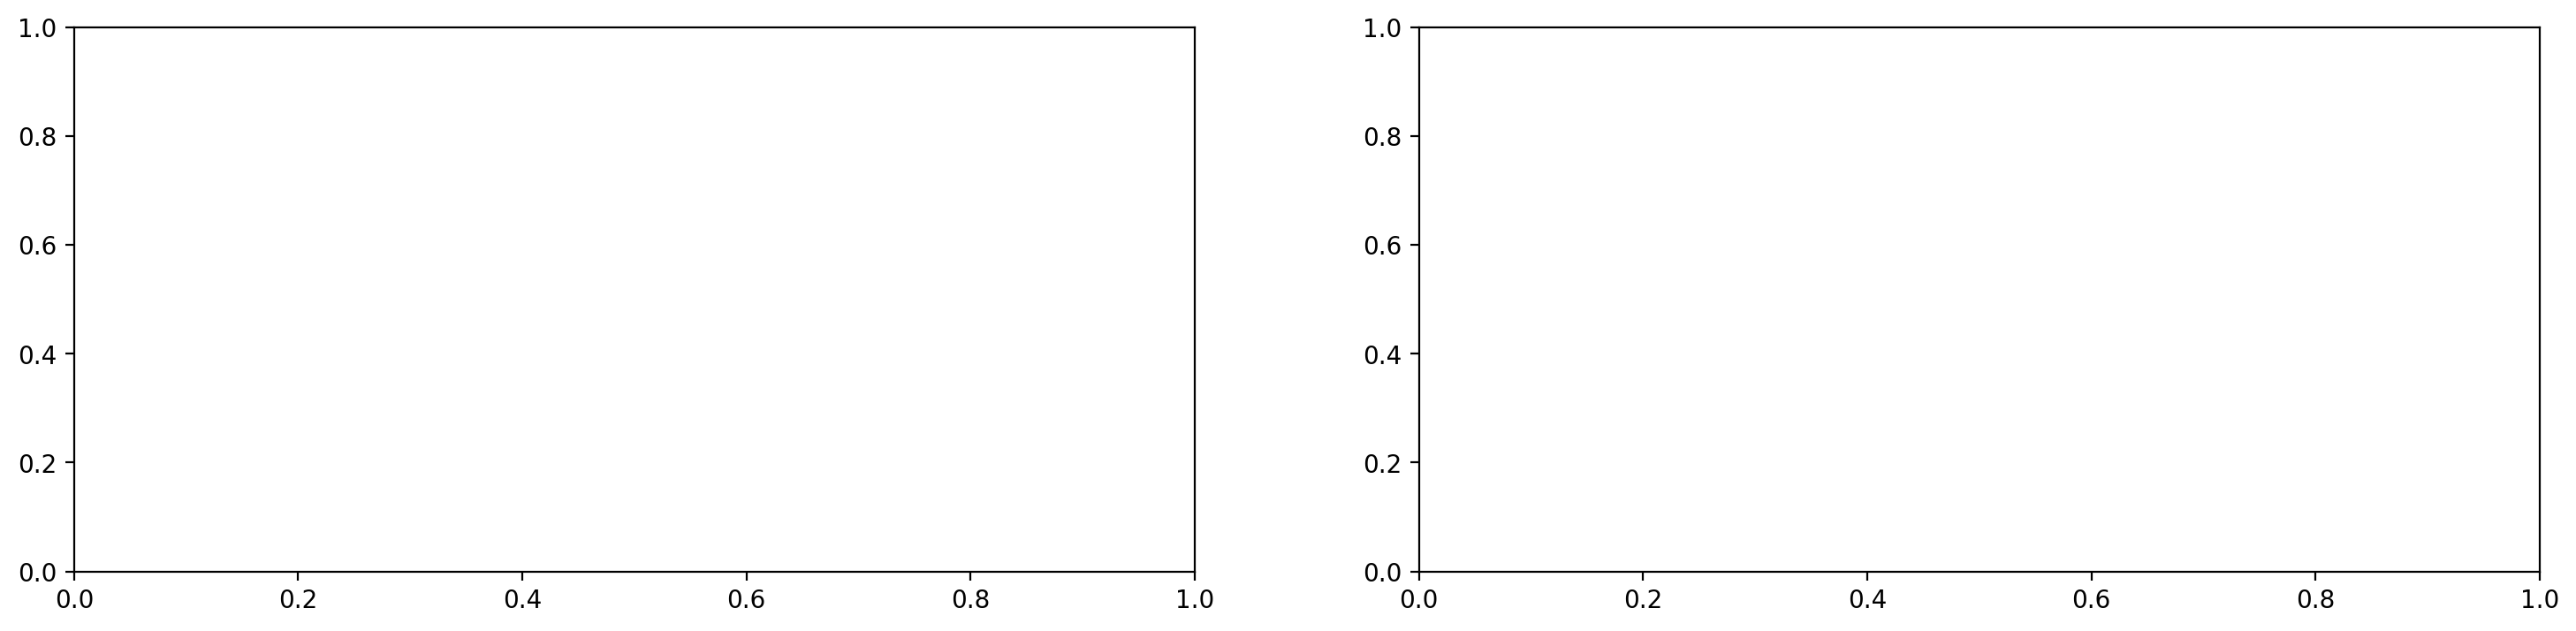

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

''' Before rebalancing classes'''

sns.countplot(y_train, ax=ax[0], color='#2c738f')
ax[0].set_title('Y_train before balancing', fontsize=14)

''' After rebalancing classes'''

sns.countplot(y_train_os, ax=ax[1], color='#06aed5')
ax[1].set_title('Y_train_os after balancing', fontsize=14);